# This is to use CAPM on Monte Carlo Simualted data to generate an Optimal Portfolio of Index Funds

In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'./load_data/data/dropped_data.csv')

In [3]:
data.iloc[0:5]

,Unnamed: 0,dates,VTSMX,VFINX,VIVAX,VIMSX,VMVIX,NAESX,VISVX,VDAIX,...,GLD,PCRIX,EMB,PIGLX,VICSX,VBMFX,VIPSX,VWITX,VFSTX,VFISX
0,0,2019-05-17,71.63,266.13,42.40,44.54,42.83,74.12,31.26,44.76,...,121.51,6.03,109.21,8.92,23.48,10.70,12.94,14.30,10.61,10.52
1,1,2019-05-16,70.99,263.70,42.05,44.18,42.56,73.58,31.09,44.37,...,122.39,5.98,109.19,8.94,23.50,10.71,12.96,14.29,10.62,10.53
2,2,2019-05-15,70.58,262.12,41.96,44.00,42.49,73.32,31.05,44.22,...,122.46,5.95,108.79,8.93,23.44,10.69,12.94,14.28,10.61,10.52
3,3,2019-05-14,69.95,260.01,41.69,43.54,42.13,72.44,30.73,43.94,...,122.67,5.87,108.45,8.93,23.45,10.70,12.93,14.27,10.61,10.52
4,4,2019-05-13,71.75,266.43,42.55,44.68,43.16,74.69,31.61,44.78,...,121.43,5.89,109.33,8.95,23.38,10.67,12.89,14.26,10.60,10.51


In [4]:
data= data.drop(columns="Unnamed: 0")
data.iloc[0:5]

,dates,VTSMX,VFINX,VIVAX,VIMSX,VMVIX,NAESX,VISVX,VDAIX,VGSIX,...,GLD,PCRIX,EMB,PIGLX,VICSX,VBMFX,VIPSX,VWITX,VFSTX,VFISX
0,2019-05-17,71.63,266.13,42.40,44.54,42.83,74.12,31.26,44.76,29.27,...,121.51,6.03,109.21,8.92,23.48,10.70,12.94,14.30,10.61,10.52
1,2019-05-16,70.99,263.70,42.05,44.18,42.56,73.58,31.09,44.37,29.11,...,122.39,5.98,109.19,8.94,23.50,10.71,12.96,14.29,10.62,10.53
2,2019-05-15,70.58,262.12,41.96,44.00,42.49,73.32,31.05,44.22,28.93,...,122.46,5.95,108.79,8.93,23.44,10.69,12.94,14.28,10.61,10.52
3,2019-05-14,69.95,260.01,41.69,43.54,42.13,72.44,30.73,43.94,28.84,...,122.67,5.87,108.45,8.93,23.45,10.70,12.93,14.27,10.61,10.52
4,2019-05-13,71.75,266.43,42.55,44.68,43.16,74.69,31.61,44.78,28.87,...,121.43,5.89,109.33,8.95,23.38,10.67,12.89,14.26,10.60,10.51


In [5]:
data.columns.tolist()[1:len(data.columns.tolist())]

summary = pd.DataFrame()
summary['funds'] = data.columns.tolist()[1:len(data.columns.tolist())]

In [6]:
summary.head()

,funds
0,VTSMX
1,VFINX
2,VIVAX
3,VIMSX
4,VMVIX


In [7]:
mean = []
sd_funds = []
for fund in summary['funds']:
    mean.append(np.mean(data[fund]))
    sd_funds.append(np.std(data[fund]))

summary['mean'] = mean
summary['std'] = sd_funds

summary.head()

,funds,mean,std
0,VTSMX,54.033903,10.169546
1,VFINX,199.351460,37.996726
2,VIVAX,33.816144,5.597419
3,VIMSX,34.620364,6.126259
4,VMVIX,35.720852,5.967815


In [8]:
# expected returns
reversed_d = data.reindex(index=data.index[::-1])

table = reversed_d.set_index('dates')

In [9]:
table

,VTSMX,VFINX,VIVAX,VIMSX,VMVIX,NAESX,VISVX,VDAIX,VGSIX,VCSAX,...,GLD,PCRIX,EMB,PIGLX,VICSX,VBMFX,VIPSX,VWITX,VFSTX,VFISX
dates,,,,,,,,,,,,,,,,,,,,,
2014-10-13,36.56,135.30,23.30,22.65,23.26,39.36,17.66,24.25,22.76,44.97,...,171.31,14.56,120.50,10.66,23.38,11.13,14.92,14.28,10.84,10.79
2014-10-14,36.50,135.13,23.26,22.54,23.17,39.23,17.60,24.23,22.53,45.17,...,171.80,14.76,120.74,10.64,23.42,11.14,14.91,14.29,10.84,10.79
2014-10-15,36.55,135.29,23.28,22.61,23.24,39.23,17.61,24.25,22.41,45.32,...,170.40,14.42,120.57,10.62,23.46,11.15,14.91,14.32,10.84,10.79
2014-10-16,36.49,135.24,23.30,22.51,23.15,39.00,17.53,24.25,22.07,45.52,...,171.72,14.28,120.69,10.62,23.46,11.15,14.88,14.34,10.85,10.79
2014-10-17,36.34,134.57,23.16,22.51,23.13,39.11,17.56,24.08,21.90,45.38,...,171.74,14.24,120.81,10.66,23.50,11.16,14.89,14.35,10.84,10.79
2014-10-18,36.24,134.27,23.15,22.42,23.09,38.92,17.53,24.09,21.85,45.45,...,171.47,14.04,120.73,10.66,23.54,11.18,14.88,14.35,10.85,10.79
2014-10-19,35.84,132.88,22.93,22.09,22.76,38.33,17.26,23.87,21.52,45.13,...,171.96,14.18,120.98,10.68,23.58,11.20,14.91,14.36,10.85,10.79
2014-10-20,35.64,132.14,22.83,21.95,22.65,38.10,17.18,23.79,21.51,45.10,...,171.05,14.04,120.66,10.70,23.63,11.21,14.95,14.38,10.85,10.79
2014-10-21,35.99,133.43,23.01,22.19,22.83,38.56,17.32,23.95,21.61,45.30,...,170.77,14.10,120.63,10.69,23.54,11.20,14.87,14.40,10.85,10.79


In [10]:
# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

In [11]:
returns_annual['VTSMX']

0.10880048506033245

In [12]:
cov_annual['VTSMX']['VTSMX']

0.017010469135554665

In [13]:
selected = table.columns.tolist()

In [14]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
index_weights = []
sharpe_ratio = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 100000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    index_weights.append(weights)

In [15]:
port_returns[0:5]

[0.041292804957366015,
 0.026776081513806557,
 0.032930454889048055,
 0.024490690455008728,
 0.03606021593347834]

In [16]:
#a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in index_weights]

In [17]:
# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [fund+' Weight' for fund in selected]

# reorder dataframe columns
df = df[column_order]

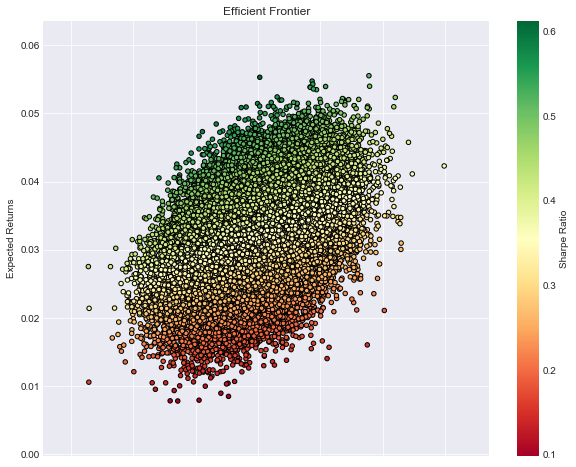

In [18]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [19]:
df

,Returns,Volatility,Sharpe Ratio,VTSMX Weight,VFINX Weight,VIVAX Weight,VIMSX Weight,VMVIX Weight,NAESX Weight,VISVX Weight,...,GLD Weight,PCRIX Weight,EMB Weight,PIGLX Weight,VICSX Weight,VBMFX Weight,VIPSX Weight,VWITX Weight,VFSTX Weight,VFISX Weight
0,0.041293,0.095839,0.430856,0.015805,0.034996,0.047035,0.029819,0.051095,0.051984,0.039352,...,0.046900,0.023844,0.036467,0.008942,0.050251,0.013250,0.016221,0.033795,0.002099,0.011343
1,0.026776,0.098239,0.272561,0.044938,0.029219,0.004354,0.044580,0.033832,0.029030,0.019620,...,0.035926,0.063867,0.028968,0.014683,0.008530,0.002853,0.060809,0.003337,0.051067,0.020721
2,0.032930,0.085830,0.383672,0.034209,0.060006,0.014762,0.010028,0.044715,0.042043,0.001075,...,0.053416,0.006895,0.005609,0.045602,0.049256,0.032357,0.057898,0.009361,0.005850,0.047504
3,0.024491,0.092400,0.265052,0.045169,0.006232,0.007463,0.020338,0.016824,0.047109,0.019745,...,0.043558,0.027089,0.048616,0.034646,0.004808,0.031995,0.021004,0.037040,0.005264,0.059250
4,0.036060,0.096095,0.375257,0.043651,0.020539,0.050229,0.005469,0.042640,0.039085,0.002498,...,0.017362,0.027211,0.018462,0.049039,0.039819,0.019287,0.027247,0.030838,0.003242,0.013918
5,0.012601,0.080315,0.156890,0.001350,0.036278,0.021202,0.006301,0.010594,0.015584,0.029403,...,0.001216,0.059618,0.054161,0.033909,0.037675,0.064450,0.050032,0.061138,0.019213,0.025364
6,0.027203,0.086783,0.313459,0.022566,0.026323,0.040418,0.013808,0.018768,0.030257,0.038380,...,0.048203,0.038274,0.049458,0.048125,0.008218,0.049205,0.018688,0.007517,0.038723,0.021279
7,0.025400,0.089357,0.284251,0.017612,0.028130,0.011465,0.028048,0.035210,0.045664,0.002099,...,0.033663,0.041155,0.046514,0.031270,0.045894,0.027334,0.036533,0.046519,0.009638,0.014705
8,0.035584,0.093417,0.380919,0.007279,0.002760,0.053790,0.007763,0.025680,0.050860,0.038156,...,0.002477,0.000723,0.053492,0.040865,0.023996,0.030560,0.053405,0.012963,0.053975,0.010865
9,0.028427,0.075382,0.377104,0.016561,0.024403,0.033733,0.012290,0.003504,0.019777,0.057328,...,0.047546,0.033399,0.047788,0.038252,0.050824,0.050513,0.048951,0.026636,0.017206,0.033222


In [20]:
data_tbill = pd.read_csv(r'./load_data/data/USTREASURY-YIELD.csv')

In [22]:
data_tbill.head()

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
0,2019-05-24,2.37,2.38,2.35,2.39,2.33,2.16,2.10,2.12,2.22,2.32,2.57,2.75
1,2019-05-23,2.38,2.38,2.37,2.40,2.32,2.12,2.08,2.11,2.20,2.31,2.56,2.75
2,2019-05-22,2.36,2.37,2.38,2.41,2.37,2.23,2.17,2.19,2.28,2.39,2.64,2.82
3,2019-05-21,2.37,2.38,2.39,2.42,2.36,2.26,2.20,2.23,2.33,2.43,2.67,2.84
4,2019-05-20,2.39,2.39,2.39,2.42,2.34,2.21,2.17,2.21,2.30,2.41,2.65,2.83


In [21]:
reversed_d = data_tbill.reindex(index=data.index[::-1])

data['dates'] = pd.to_datetime(data['dates'])

max_date = max(data['dates'])
min_date = min(data['dates'])

In [23]:

data_tbill['Date'] = pd.to_datetime(data_tbill['Date'])

mask = (data_tbill['Date'] > min_date) & (data_tbill['Date'] <= max_date)
data_tbill = data_tbill.loc[mask]

In [24]:
data_tbill.head()

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
5,2019-05-17,2.39,2.40,2.39,2.42,2.33,2.20,2.15,2.17,2.27,2.39,2.63,2.82
6,2019-05-16,2.40,2.41,2.40,2.43,2.33,2.20,2.15,2.18,2.28,2.40,2.65,2.84
7,2019-05-15,2.40,2.41,2.42,2.43,2.30,2.16,2.12,2.15,2.25,2.37,2.63,2.82
8,2019-05-14,2.41,2.42,2.41,2.43,2.32,2.20,2.17,2.20,2.30,2.42,2.67,2.86
9,2019-05-13,2.41,2.42,2.41,2.42,2.32,2.18,2.15,2.18,2.28,2.40,2.65,2.83


In [25]:


table= reversed_d.set_index('Date')

In [26]:
table.head()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2012-09-06,0.10,NaN,0.11,0.14,0.18,0.27,0.34,0.68,1.12,1.68,2.41,2.80
2012-09-07,0.09,NaN,0.11,0.14,0.18,0.25,0.33,0.64,1.09,1.67,2.42,2.81
2012-09-10,0.09,NaN,0.10,0.14,0.18,0.25,0.33,0.66,1.10,1.68,2.43,2.83
2012-09-11,0.09,NaN,0.10,0.14,0.18,0.25,0.33,0.67,1.12,1.70,2.44,2.84
2012-09-12,0.09,NaN,0.10,0.13,0.18,0.25,0.33,0.70,1.17,1.77,2.52,2.92


In [27]:
np.mean(table['3 MO'])/100 * 4

0.026082479141835556

In [28]:
weights = [0]*len(returns_annual)
weights[0] = 1
weights /= np.sum(weights)
returns = np.dot(weights, returns_annual)
volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
sharpe = returns / volatility 
sharpe

0.8342048028441877

In [29]:
risk_free = np.mean(table['3 MO'])/100 * 4  # This can change, 3 month T-bill yield

weights = [0]*np.shape(cov_annual)[0]
weights[0] = 1
weights = np.array(weights)
sigma_T = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))

def beta(stock):
    beta = cov_annual[stock]['VTSMX']/cov_annual['VTSMX']['VTSMX']

def CML(beta):
    # r_f + (R_T-r_f)/(sigma_T) * sigma_p
    # ?_T indicattes a property of market returns (VTSMX?)
    return -risk_free + sharpe*beta




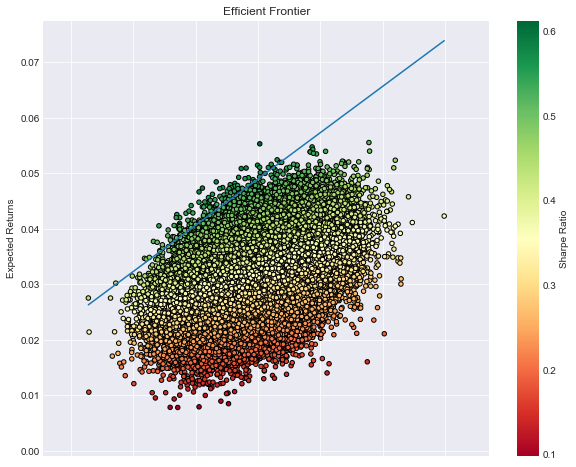

In [30]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
x_base = np.linspace(min(df['Volatility']), max(df['Volatility']), num=100)
plt.plot(x_base, CML(x_base))
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [31]:
best_port_idx = np.abs(df['Returns'].values - CML(df['Volatility'].values)).argsort()[:5]

In [32]:
df.iloc[best_port_idx]

,Returns,Volatility,Sharpe Ratio,VTSMX Weight,VFINX Weight,VIVAX Weight,VIMSX Weight,VMVIX Weight,NAESX Weight,VISVX Weight,...,GLD Weight,PCRIX Weight,EMB Weight,PIGLX Weight,VICSX Weight,VBMFX Weight,VIPSX Weight,VWITX Weight,VFSTX Weight,VFISX Weight
35100,0.041254,0.080719,0.511079,0.026238,0.034276,0.016272,0.061452,0.033900,0.000993,0.021449,...,0.046178,0.000215,0.034530,0.027015,0.011390,0.035298,0.017183,0.038112,0.059584,0.066033
76803,0.035877,0.074246,0.483220,0.049676,0.063096,0.002138,0.048879,0.026151,0.022385,0.002312,...,0.028272,0.008765,0.065240,0.006013,0.039811,0.056148,0.063895,0.043789,0.044785,0.047958
37456,0.039950,0.079188,0.504497,0.045058,0.032309,0.054185,0.024283,0.030661,0.051099,0.032530,...,0.017761,0.024032,0.054580,0.045274,0.055927,0.027940,0.033487,0.046556,0.043547,0.015159
46850,0.051950,0.093508,0.555560,0.067325,0.064704,0.037443,0.040264,0.056828,0.056020,0.066857,...,0.007983,0.010506,0.001459,0.015629,0.023602,0.049482,0.050014,0.049560,0.016822,0.010436
86885,0.044377,0.084424,0.525644,0.031217,0.039092,0.067276,0.067097,0.054144,0.050779,0.029988,...,0.010581,0.016391,0.035512,0.065872,0.059971,0.052649,0.052786,0.018396,0.007392,0.012534


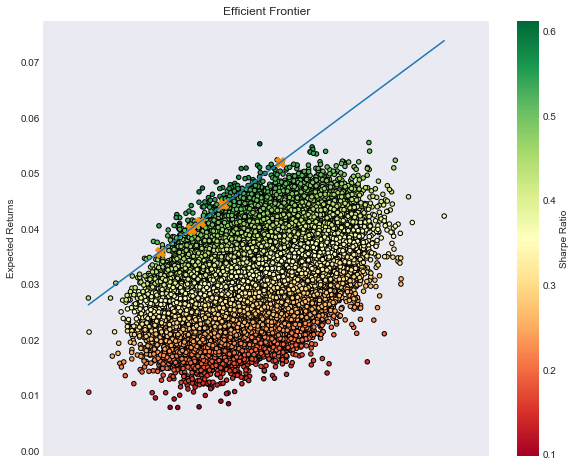

In [33]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
ax = df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
df.iloc[best_port_idx].plot.scatter(
                x='Volatility', y='Returns', c='DarkOrange', s=100, marker='X',
                ax=ax)
x_base = np.linspace(min(df['Volatility']), max(df['Volatility']), num=100)
plt.plot(x_base, CML(x_base))
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [34]:
df.iloc[best_port_idx].to_csv(r'./portfolio/capm_portfolios.csv')